In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from math import sin, cos

import checker
import utils

## Po co nam ten numpy?
Przydaje nam się z kilku powodów:
* Napisanie jednej linijki w numpy jest szybsze i wygodniejsze niż napisanie pętli, jest też mniejsza szansa, że zrobimy gdzieś po drodze błąd. Oczywiście najpierw trzeba się przyzwyczaić do intefejsu.
* Numpy jest znacznie bardziej wydajny niż napisane przez nas funkcje w "czystym" Pythonie.
* PyTorch, biblioteka do głębokiego uczenia, z której później będziemy korzystać, ma bardzo podobny interfejs.

**Kilka przykładów:**

In [2]:
%%timeit

X = [random.random() for _ in range(10000)]
y = [sin(x) + cos(x) for x in X]

6.88 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit

X = np.random.random(10000)
y = np.sin(X) + np.cos(X)

290 µs ± 37.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def numpy_almost_var(x):
    m = np.mean(x)
    powers = (x - m) ** 4
    return np.mean(powers)

X = np.random.random(10000)

In [5]:
%%timeit
almost_variance(X)

12 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit
numpy_almost_var(X)

785 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Zadanie 1
Wykonać poniższe ćwiczenia przy pomocy Numpy:

1. Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz funkcję, która dla zadnego $K$ zwraca tabliczkę mnożenia, tzn. tablicę $A$ taką, że $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,K\}$$
    <img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

    Przydatne funkcje: `np.arange`, `np.reshape`. 

In [7]:
def multiplication_table(K):
    base = np.arange(K)+1
    table = base.reshape((K,1)) * base
    return table

print("Wynik funkcji multiplication:\n", multiplication_table(10))
checker.check_multiplication_table(multiplication_table)

Wynik funkcji multiplication:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


2. Mając daną tablice jednowymiarową oraz liczbę `x` znajdź najbliższą wartość `x` w `A`, tzn. 
    $$ \mathrm{closest}(x, A) = \arg\min_{a\in A}|x - a|  $$

    Przydatne funkcje: `np.argmin`, `np.abs`. 

In [8]:
def closest(x, A):
    B = np.abs(A - x)
    result = A[np.argmin(B)]
    return result

print("Wynik funkcji closest:", closest(9, np.array([5, 8, 14])))
checker.check_closest(closest)

Wynik funkcji closest: 8


3. Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

    $$
    \mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
    $$

    Potencjalnie przydatne funkcje: `np.cumprod`, `np.concatenate`, `np.sum`.

In [9]:
def poly(x, A):
    N = len(A)
    B = np.array([])
    for i in range(N):
        B = np.append(B,np.power(x,i))
    C = np.vstack((A, B))
    pomnozone = np.cumprod(C, axis=0)
    result = np.sum(pomnozone[1])
    return result

print("Wynik funkcji poly:", poly(3, np.array([1, 2, 4])))
checker.check_poly(poly)

Wynik funkcji poly: 43.0


## Zadanie 2
Dla macierzy $X$ o wymiarze `[N, D]` zaimplementować operację whiteningu: 

$\mathrm{whiten}(X) = (X-\mathrm{mean} X)(\mathrm{cov} X)^{-1/2}$

$\mathrm{mean} X$ rozumiemy jako wektor wierszowy, którego każdy element jest zdefiniowany jako: $$(\mathrm{mean}X)_i = \frac{1}{N} \sum_{j=1}^N X_{ij}$$

**Uwaga 1: np.cov przyjmuje, że każdy wiersz macierzy to osobna cecha, a każda kolumna to osobna obserwacja - czyli odwrotnie niż u nas. Dlatego przed podaniem naszej macierzy do np.cov trzeba ją transponować.**

**Uwaga 2: pierwiastek z macierzy to nie to samo co pierwiastkowanie element-wise, takie jak w np.sqrt. Najlepiej poszukać odpowiedniej funkcji w bibliotece scipy i ją zaimportować.**

In [10]:
from scipy.linalg import sqrtm

def whiten(X):
    x_mean = X - np.mean(X, axis=0)
    
    x_cov = np.linalg.inv(np.cov(X.T))
    x_cov_inv_sqrt = sqrtm(x_cov)
    
    result = np.dot(x_mean, x_cov_inv_sqrt)
    
    return result

#wciąż coś nie tak..

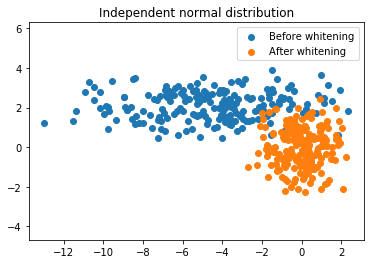

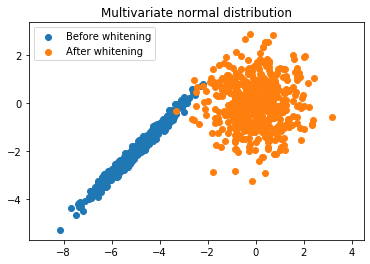

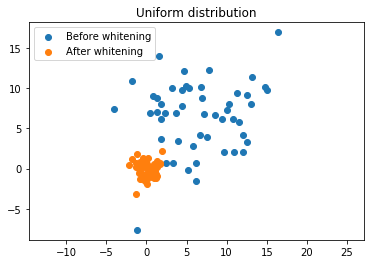

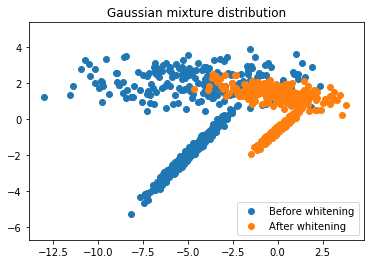

In [11]:
X_diag_normal = np.random.multivariate_normal([-5, 2.], [[10, 0], [0, 0.5]], size=200)
X_multivariate_normal = np.random.multivariate_normal([-5, -2], [[1, 0.99], [0.99, 1]], size=500)
X_uniform = np.random.normal(6, 5, size=(50, 2))
X_gmm = np.concatenate((X_multivariate_normal, X_diag_normal), axis=0)
    
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution")
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution")
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution")
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution")

## Standaryzacja a whitening
W pierwszym notebooku implementowaliśmy następującą funkcję, która wykonuje zadanie podobne do whiteningu:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

Tę funkcję nazwijmy **standaryzacją**. Czym zatem różni się standaryzacja od whiteningu? Czy nie wystarczy znormalizować kolumn i zamiast tego musimy wykonywać znacznie bardziej kosztowną operację liczenia i odwracania macierzy kowariancji?

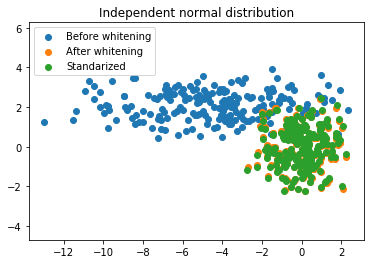

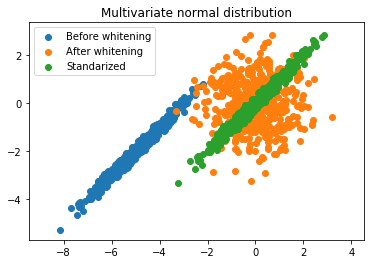

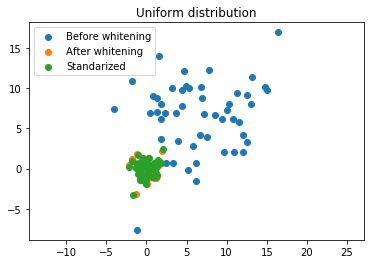

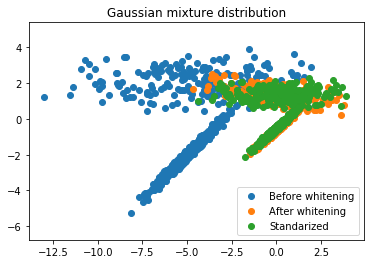

In [12]:
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution", standarize=True)
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution", standarize=True)
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution", standarize=True)
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution", standarize=True)

# Zadanie 3
Należy:
1. Wysamplować $10000$ przykładów z rozkładu normalnego $\mathcal{N}(\mu, \sigma)$. **Należy wybrać niestandardowe parametry**, tzn. $\mu \neq 0$ oraz $\sigma \neq 1$.
2. Następnie należy policzyć, jaki procent wylosowanych przykładów, znajduje się od środka w odległości większej niż: 
    * $1\sigma$ (tzn. $|x - \mu| > 1\sigma$)
    * $2\sigma$ (tzn. $|x - \mu| > 2\sigma$)
    * $3\sigma$ (tzn. $|x - \mu| > 3\sigma$)
    
3. Wypisać wszystkie przykłady, które wpadają do ostatniej kategorii (tzn. są oddalone o co najmniej $3\sigma$ od średniej).

In [13]:
# Podpunkt 1: Wysamplować 10000 przykładów z rozkładu normalnego
loc = 1. # średnia wybranego rozkładu normalnego
scale = 0.5 # odchylenie standardowe wybranego rozkładu normalnego
X = np.random.normal(loc=loc, scale=scale, size=(1,10000))

# Podpunkt 2: Wyliczyć i wypisać procent 

sigmas = [1,2,3]
sig_val = []

for i in sigmas:
    sig_mean = np.abs(X - np.mean(X))
    sig = np.where(sig_mean > i * scale)
    sig_val.append([sig_mean[sig]])

sig_1 = sig_val[0]
sig_2 = sig_val[1]
sig_3 = sig_val[2]

N = X.shape[1]
sig_1_prct = (len(sig_1[0])/N) * 100
sig_2_prct = (len(sig_2[0])/N) * 100
sig_3_prct = (len(sig_3[0])/N) * 100

print("Przykłady oddalone o więcej niż 1 sigma: ", sig_1_prct,
      "%\nPrzykłady oddalone o więcej niż 2 sigma: ", sig_2_prct,
      "%\nPrzykłady oddalone o więcej niż 3 sigma: ", sig_3_prct, "%")

# Podpunkt 3: Wypisać elementy, które są oddalone od średniej o 3 sigma.

print("\nOutliery: ", X[np.abs(X - loc) > 3 * scale])

# Trochę wizualizacji
#utils.visualize_normal_dist(X, loc, scale)

Przykłady oddalone o więcej niż 1 sigma:  31.15 %
Przykłady oddalone o więcej niż 2 sigma:  4.78 %
Przykłady oddalone o więcej niż 3 sigma:  0.25 %

Outliery:  [ 2.52095752  2.51662415 -0.5454447   2.98326292 -0.65619899  2.5382146
 -0.57377087  2.58877684 -0.56456727 -0.54407988 -0.60669152 -0.56281959
  2.65805568 -0.50581457  2.87153219 -0.76129415 -0.64831126  2.55479152
  3.00212603 -0.65419389  2.57779754  2.6670323  -0.52292399  3.02361881
 -1.36194349]
